<h2><a href="https://leetcode.com/problems/maximum-score-words-formed-by-letters">1255. Maximum Score Words Formed by Letters</a></h2><h3>Hard</h3><hr><p>Given a list of <code>words</code>, list of&nbsp; single&nbsp;<code>letters</code> (might be repeating)&nbsp;and <code>score</code>&nbsp;of every character.</p>

<p>Return the maximum score of <strong>any</strong> valid set of words formed by using the given letters (<code>words[i]</code> cannot be used two&nbsp;or more times).</p>

<p>It is not necessary to use all characters in <code>letters</code> and each letter can only be used once. Score of letters&nbsp;<code>&#39;a&#39;</code>, <code>&#39;b&#39;</code>, <code>&#39;c&#39;</code>, ... ,<code>&#39;z&#39;</code> is given by&nbsp;<code>score[0]</code>, <code>score[1]</code>, ... , <code>score[25]</code> respectively.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> words = [&quot;dog&quot;,&quot;cat&quot;,&quot;dad&quot;,&quot;good&quot;], letters = [&quot;a&quot;,&quot;a&quot;,&quot;c&quot;,&quot;d&quot;,&quot;d&quot;,&quot;d&quot;,&quot;g&quot;,&quot;o&quot;,&quot;o&quot;], score = [1,0,9,5,0,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0]
<strong>Output:</strong> 23
<strong>Explanation:</strong>
Score  a=1, c=9, d=5, g=3, o=2
Given letters, we can form the words &quot;dad&quot; (5+1+5) and &quot;good&quot; (3+2+2+5) with a score of 23.
Words &quot;dad&quot; and &quot;dog&quot; only get a score of 21.</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> words = [&quot;xxxz&quot;,&quot;ax&quot;,&quot;bx&quot;,&quot;cx&quot;], letters = [&quot;z&quot;,&quot;a&quot;,&quot;b&quot;,&quot;c&quot;,&quot;x&quot;,&quot;x&quot;,&quot;x&quot;], score = [4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,10]
<strong>Output:</strong> 27
<strong>Explanation:</strong>
Score  a=4, b=4, c=4, x=5, z=10
Given letters, we can form the words &quot;ax&quot; (4+5), &quot;bx&quot; (4+5) and &quot;cx&quot; (4+5) with a score of 27.
Word &quot;xxxz&quot; only get a score of 25.</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> words = [&quot;leetcode&quot;], letters = [&quot;l&quot;,&quot;e&quot;,&quot;t&quot;,&quot;c&quot;,&quot;o&quot;,&quot;d&quot;], score = [0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0]
<strong>Output:</strong> 0
<strong>Explanation:</strong>
Letter &quot;e&quot; can only be used once.</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= words.length &lt;= 14</code></li>
	<li><code>1 &lt;= words[i].length &lt;= 15</code></li>
	<li><code>1 &lt;= letters.length &lt;= 100</code></li>
	<li><code>letters[i].length == 1</code></li>
	<li><code>score.length ==&nbsp;26</code></li>
	<li><code>0 &lt;= score[i] &lt;= 10</code></li>
	<li><code>words[i]</code>, <code>letters[i]</code>&nbsp;contains only lower case English letters.</li>
</ul>


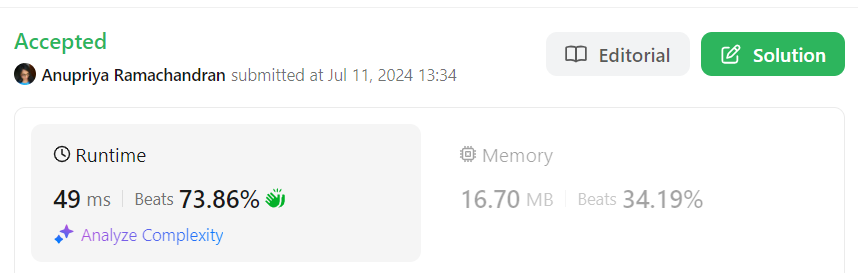

In [1]:
from collections import Counter
from typing import List

class Solution:
    def maxScoreWords(self, words: List[str], letters: List[str], scores: List[int]) -> int:
        score_map = dict()
        alphabets = "abcdefghijklmnopqrstuvwxyz"
        for char, score in zip(alphabets, scores):
            score_map[char] = score

        letter_map = dict()
        for letter in letters:
            letter_map[letter] = letter_map.get(letter, 0) + 1


        # helper function to check letters can form the word
        def can_form_word(word, char_store):
            word_count = Counter(word)
            for char in word_count:
                if char_store.get(char, 0) < word_count[char]:
                    return False
            return True 

        
        def backtrack(index, letter_map, current_score):
            nonlocal maxscore
            if index == len(words):   # Base condition: if we have traversed all words, return the resultant score
                return current_score

            # skipping the current_word
            backtrack(index + 1, letter_map, current_score)

            word = words[index]       # choosing the word at current index
            if can_form_word(word, letter_map):  # checking if word can be formed with available letter map
                word_score = 0
                for char in word:
                    letter_map[char] -= 1
                    word_score += score_map[char]

                backtrack(index + 1 , letter_map, current_score + word_score)  # passing the resultant letter map and score for further operations
                maxscore = max(maxscore, current_score + word_score)  # keeping account of maxscore enountered until now 

                # Retrack back for backtracking operationss
                for char in word:
                    letter_map[char] += 1

                
        maxscore = 0
        backtrack(0, letter_map, 0)   # we need three args: the index word which we are choosing/skipping, available letter map, score until now
        return maxscore